# Plotting performance of denoisining techniques
Here, plot the results of all denoising techniques.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
with open('axis.txt') as file:
    wavenumbers = [float(line.rstrip()) for line in file]

Text(0.5, 1.0, 'Training Losses')

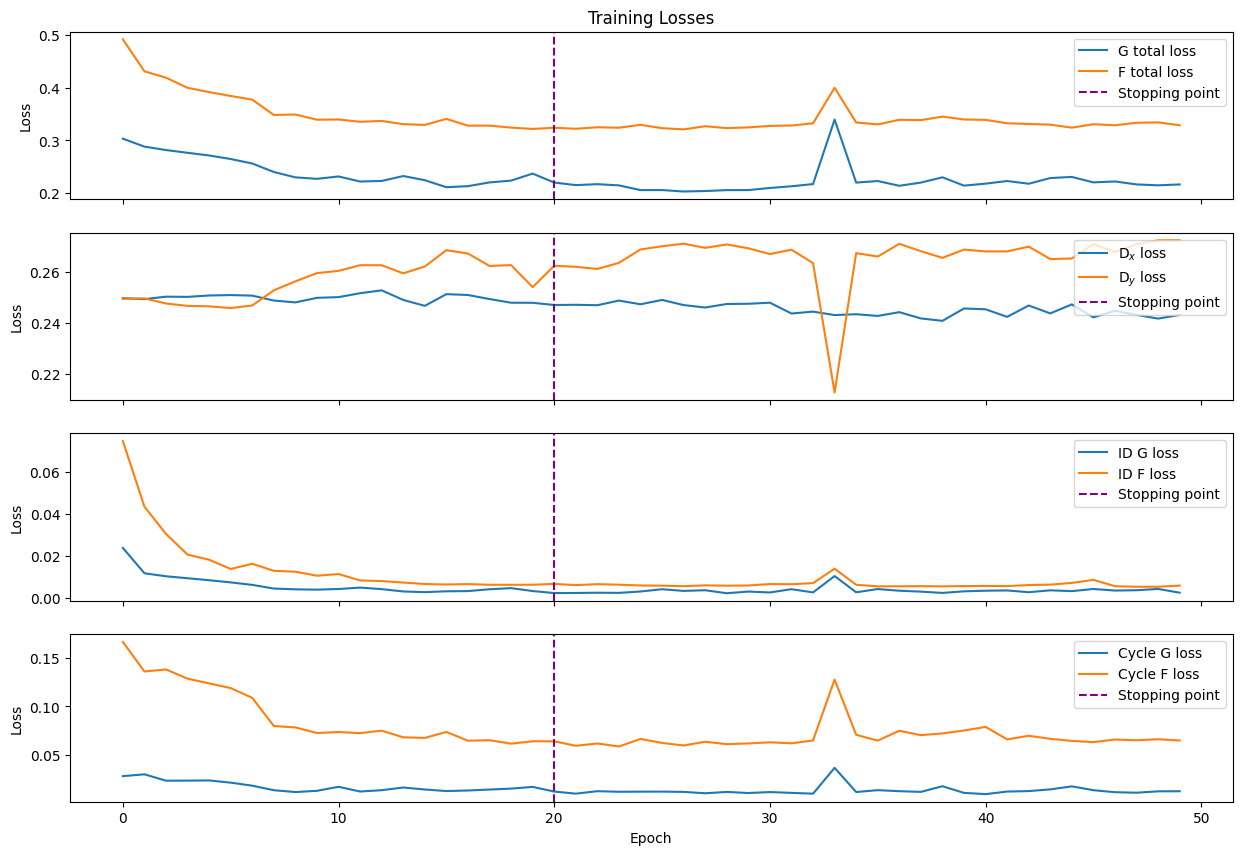

In [3]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()
fig, ax = plt.subplots(4,1,figsize=(15, 10),sharex=True)

ax[0].plot(history['G_loss'],label='G total loss')
ax[0].plot(history['F_loss'],label='F total loss')
ax[0].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper right')
ax[1].plot(history['D_X_loss'],label='D$_x$ loss')
ax[1].plot(history['D_Y_loss'],label='D$_y$ loss')
ax[1].set_ylabel('Loss')
ax[1].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[1].legend(loc='upper right')
ax[2].plot(history['ID_G_loss'],label='ID G loss')
ax[2].plot(history['ID_F_loss'],label='ID F loss')
ax[2].set_ylabel('Loss')
ax[2].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[2].legend(loc='upper right')
ax[3].plot(history['Cycle_G_loss'],label='Cycle G loss')
ax[3].plot(history['Cycle_F_loss'],label='Cycle F loss')
ax[3].set_ylabel('Loss')
ax[3].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[3].legend(loc='upper right')
ax[-1].set_xlabel('Epoch')
ax[0].set_title('Training Losses')



In [4]:
## Plot validation Losses

In [5]:
unsupervised_valid_loss = []
supervised_valid_loss = []
for i in range((50)):
    unsupervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_' + str(i) + '.npy'))
    supervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_sup_' + str(i) + '.npy'))

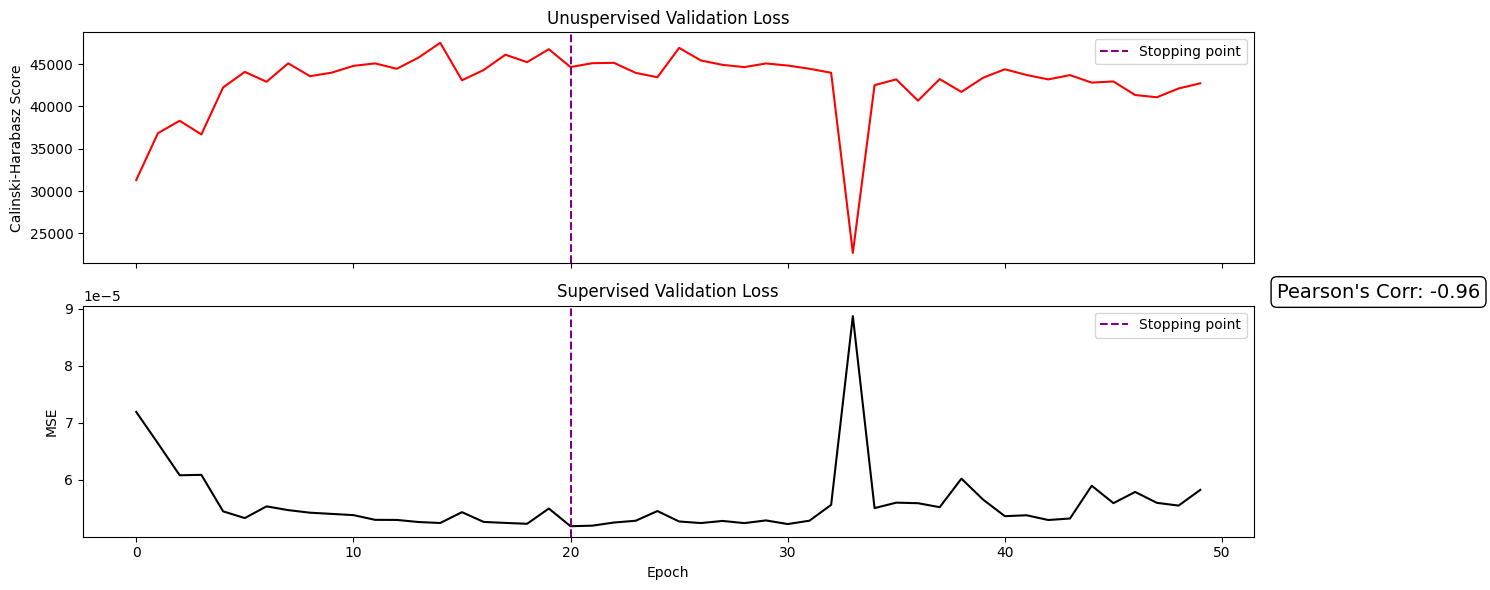

In [6]:
fig, ax = plt.subplots(2,sharex=True,figsize=(15, 6))

ax[0].plot(unsupervised_valid_loss,color='red')
ax[0].set_title('Unuspervised Validation Loss')
ax[0].set_ylabel('Calinski-Harabasz Score')
ax[0].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[0].legend()
ax[1].plot(supervised_valid_loss,color='black')
ax[1].set_title('Supervised Validation Loss')
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('Epoch')
textstr = "Pearson's Corr: -0.96"
ax[1].text(1.02, 1.1, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top',color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
ax[1].axvline(x=20,ls='--',color='purple',label = 'Stopping point')
ax[1].legend()
fig.tight_layout()

In [7]:
# compute Pearson correlation between unsupervised and supervised validation losses
corr, _ = pearsonr(unsupervised_valid_loss, supervised_valid_loss)
print(corr)

-0.9560748052782001


## Load in classically denoised spectra with corresponding parameters and network denoised spectra

In [8]:
wav = np.load('wavelet_spectra.npy',allow_pickle=True)
wav_params = np.load('wavelet_spectra_params.npy',allow_pickle=True)
pc = np.load('PCA_spectra.npy',allow_pickle=True)
pc_params = np.load('PCA_spectra_params.npy',allow_pickle=True)
sg = np.load('SG_spectra.npy',allow_pickle=True)
sg_params = np.load('SG_spectra_params.npy',allow_pickle=True)
gt = np.load('network_pred_GT_corrected_normalised.npy',allow_pickle=True)
pred = np.load('network_pred_corrected_normalised.npy',allow_pickle=True)
net_input = np.load('network_input_corrected_normalised.npy',allow_pickle=True)

In [9]:
#compute network denoised spectra MSE

In [10]:
net_pred_MSE =np.mean(np.mean((pred - gt)**2,axis=1))
net_pred_std=np.std(np.mean((pred - gt)**2,axis=1))


print(net_pred_MSE)
print(net_pred_std)

0.0037269136618614646
0.002239751899715681


In [11]:
#compute wavelet denoised MSE

In [12]:
wav_MSEs = []
wav_stds = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))
    wav_stds.append(np.std(np.mean((wav[i] - gt)**2,axis=1)))
wav_index = np.where(wav_MSEs==np.min(wav_MSEs))
wave_mse_plot = np.min(wav_MSEs)
wave_std_plot = wav_stds[int(np.squeeze(wav_index))]

In [13]:
#compute PCA denoised MSE

In [14]:
PCA_MSEs = []
PCA_stds = []
for i in range(np.shape(pc)[0]):
    PCA_MSEs.append(np.mean(np.mean((pc[i] - gt)**2,axis=1)))
    PCA_stds.append(np.std(np.mean((pc[i] - gt)**2,axis=1)))
pc_index = np.where(PCA_MSEs==np.min(PCA_MSEs))
pca_mse_plot = np.min(PCA_MSEs)
pca_std_plot = PCA_stds[int(np.squeeze(pc_index))]

In [15]:
#compute SG denoised MSE

In [16]:
SG_MSEs = []
SG_stds = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))
    SG_stds.append(np.std(np.mean((sg[i] - gt)**2,axis=1)))
sg_index = np.where(SG_MSEs==np.min(SG_MSEs))
sg_MSE_plot = np.min(SG_MSEs)
sg_std_plot = SG_stds[int(np.squeeze(sg_index))]



In [17]:
sg_MSE_plot

0.011207943838577062

Text(0.5, 1.0, 'Test MSE for all denoisining techniques')

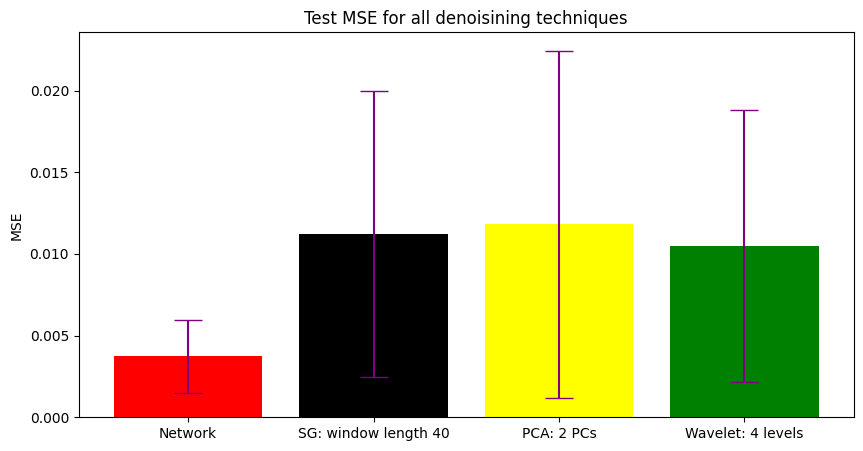

In [18]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(['Network','SG: window length ' + str(int(sg_params[sg_index])), 'PCA: ' + str(int(pc_params[pc_index])) + ' PCs', 'Wavelet: ' + str(int(wav_params[wav_index])) + ' levels'],[net_pred_MSE,sg_MSE_plot, pca_mse_plot, wave_mse_plot],yerr = [net_pred_std, sg_std_plot, pca_std_plot, wave_std_plot],ecolor='purple', capsize=10,color=['red', 'black', 'yellow', 'green'])
plt.ylabel('MSE')
plt.title('Test MSE for all denoisining techniques')


In [19]:
# plot performance of all classical techniques vs parameterisations

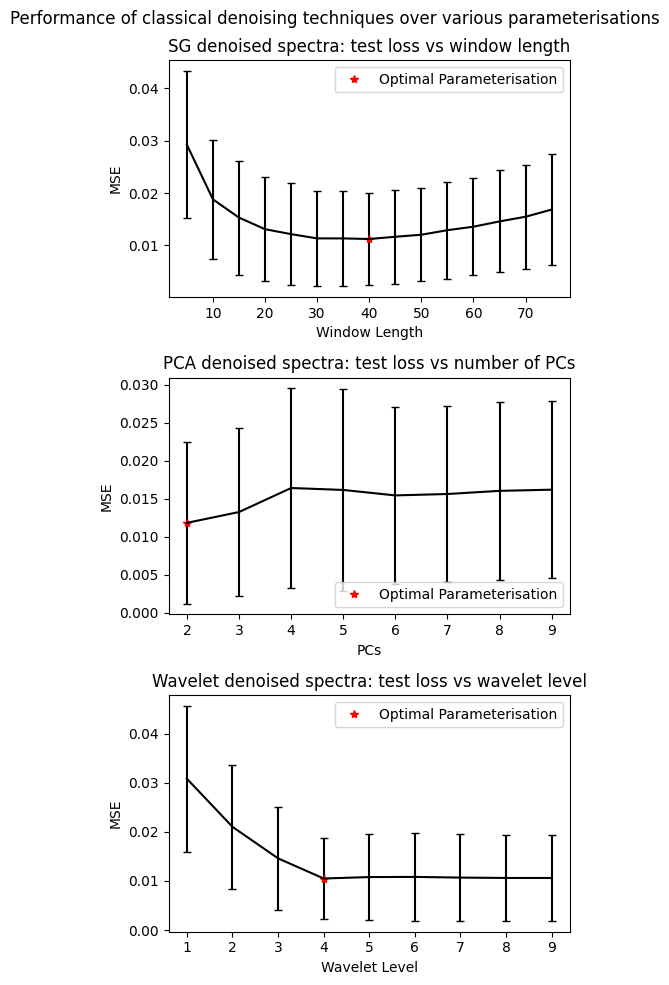

In [20]:
fig, ax = plt.subplots(3,1,figsize=(5, 10))

#ax[0].plot(sg_params, SG_MSEs)
ax[0].errorbar(sg_params, SG_MSEs, SG_stds, capsize=3,color='black')
ax[0].plot(sg_params[int(np.squeeze(sg_index))], SG_MSEs[int(np.squeeze(sg_index))], 'r*', label = 'Optimal Parameterisation')
ax[0].set_xlabel('Window Length')
ax[0].set_ylabel('MSE')
ax[0].set_title('SG denoised spectra: test loss vs window length')
ax[0].legend()
ax[1].errorbar(pc_params,PCA_MSEs,PCA_stds, capsize=3,color='black')
ax[1].plot(pc_params[int(np.squeeze(pc_index))], PCA_MSEs[int(np.squeeze(pc_index))], 'r*', label = 'Optimal Parameterisation')
ax[1].set_xlabel('PCs')
ax[1].set_ylabel('MSE')
ax[1].set_title('PCA denoised spectra: test loss vs number of PCs')
ax[1].legend()
ax[2].errorbar(np.squeeze(wav_params),np.squeeze(wav_MSEs),wav_stds, capsize=3,color='black')
ax[2].plot(wav_params[int(np.squeeze(wav_index))], wav_MSEs[int(np.squeeze(wav_index))], 'r*', label = 'Optimal Parameterisation')
ax[2].set_xlabel('Wavelet Level')
ax[2].set_ylabel('MSE')
ax[2].set_title('Wavelet denoised spectra: test loss vs wavelet level')
ax[2].legend()
fig.suptitle('Performance of classical denoising techniques over various parameterisations')
fig.tight_layout()

In [21]:
# plot example denoised spectra for all techniques

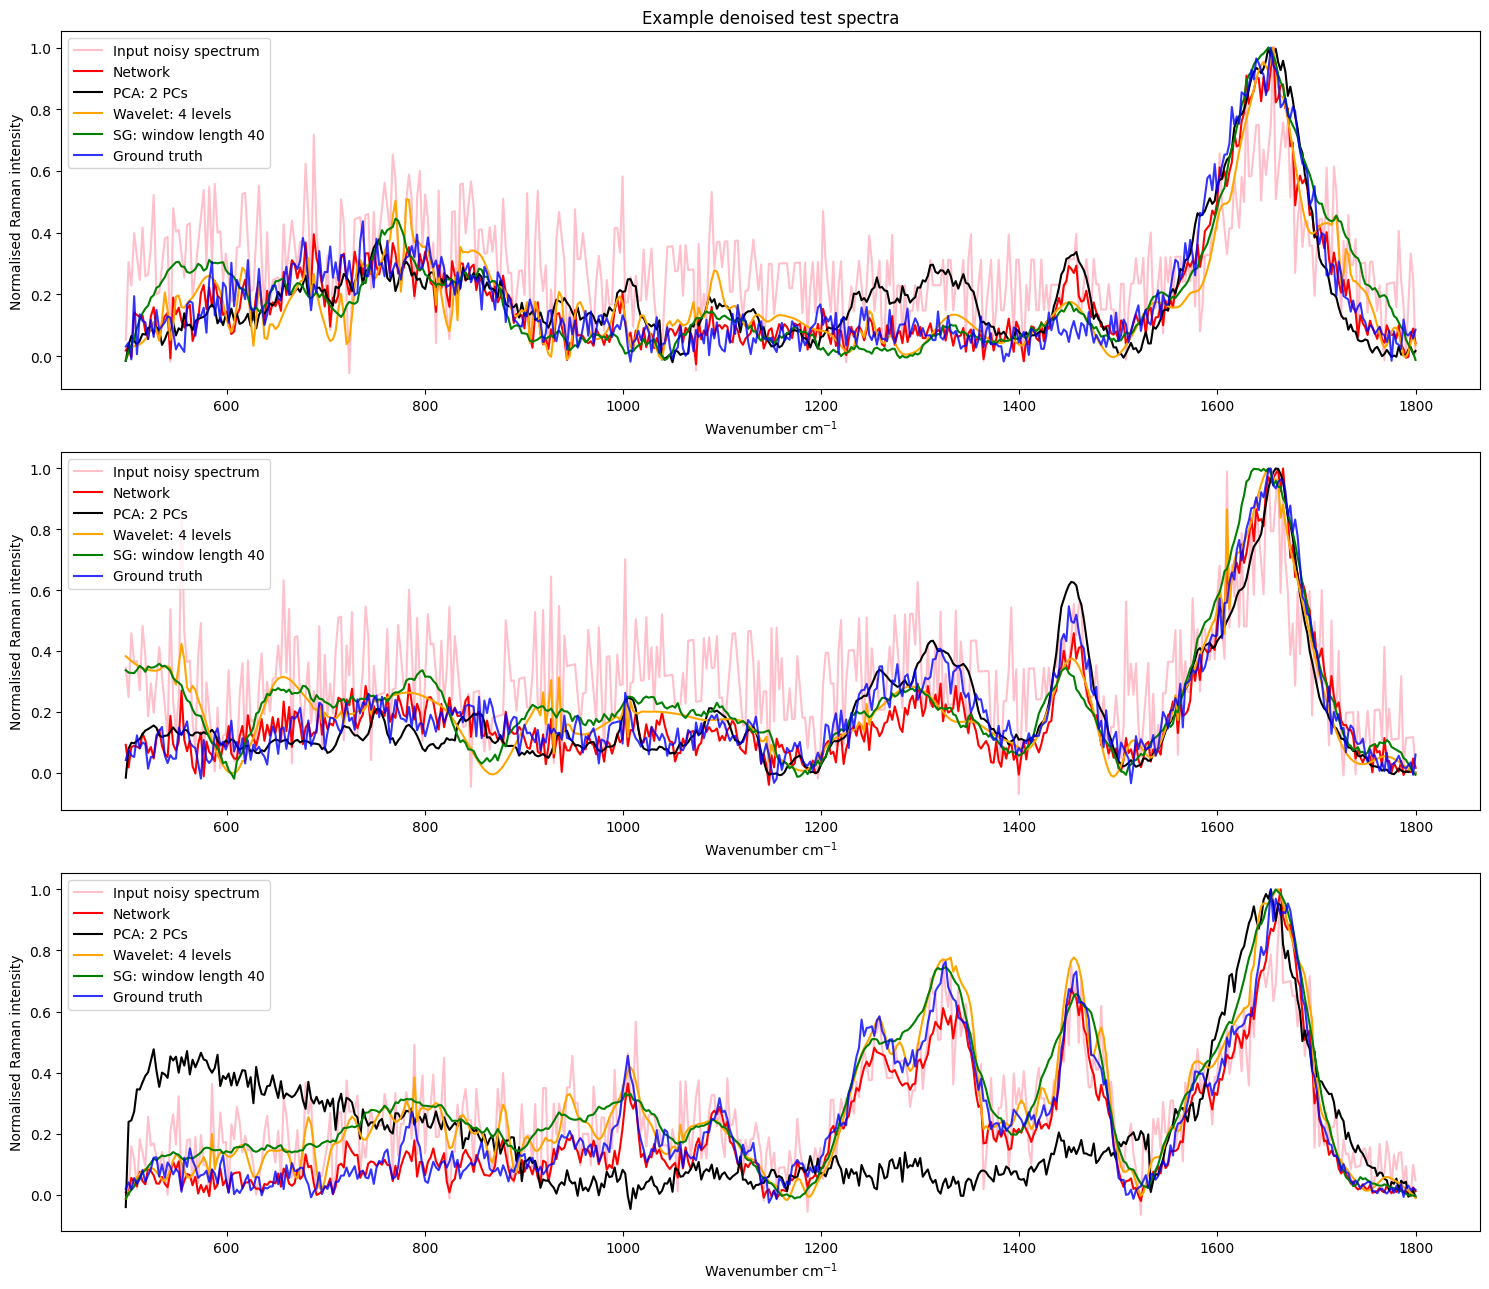

In [22]:
example_inds=[5000,3000,10000]
plot_num=3
fig, ax = plt.subplots(plot_num,figsize=(15, 13))
for i in range(plot_num):
    index = example_inds[i]
    #plt.plot(net_input[index],label='Input noisy')
    ax[i].plot(wavenumbers, np.squeeze(net_input[index]), label='Input noisy spectrum',color="pink")
    ax[i].plot(wavenumbers, np.squeeze(pred[index]), label='Network',color="red")
    ax[i].plot(wavenumbers, np.squeeze(pc[pc_index,index]), label='PCA: ' + str(int(pc_params[pc_index])) + ' PCs',color="black")
    ax[i].plot(wavenumbers, np.squeeze(wav[wav_index,index]), label='Wavelet: ' + str(int(wav_params[wav_index])) + ' levels',color="orange")
    ax[i].plot(wavenumbers, np.squeeze(sg[sg_index,index]), label='SG: window length ' + str(int(sg_params[sg_index])),color="green")
    ax[i].plot(wavenumbers, gt[index],label='Ground truth',alpha=0.8,color="blue")
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Normalised Raman intensity')
    ax[i].set_xlabel('Wavenumber cm$^{-1}$')
ax[0].set_title('Example denoised test spectra')
fig.tight_layout()

# determine the optimal cluster number for inferring test spectra classes
# this is used to calculate the per-cluster MSE to account for class imbalances
# during evaluation
network_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

scores = []
cluster_nums = range(2,20,2)
for i in range(2,20,2):
    kmeans_model = KMeans(n_clusters=i, random_state=4).fit(network_pred_GT)
    labels = kmeans_model.labels_
    scores.append(metrics.calinski_harabasz_score(network_pred_GT, labels))

plt.plot(cluster_nums,scores)
plt.xlabel('Cluster number')
plt.ylabel('Calinski Harabasz Score')

In [23]:
from sklearn.cluster import KMeans
network_pred_GT = np.load('./epoch_20/network_denoised_GT.npy')

kmeans_model = KMeans(n_clusters=8, random_state=4).fit(network_pred_GT)
labels = kmeans_model.labels_

/home/ciaran/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# claulate MSEs over whole test set, as well as the mean over the MSE for the spectra in each cluster

In [24]:
wav_MSEs = []
wav_stds = []
wav_class_mean_MSEs = []
wav_class_std_MSEs = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))
    wav_stds.append(np.std(np.mean((wav[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((wav[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    wav_class_mean_MSEs.append(np.mean(MSE_class))
    wav_class_std_MSEs.append(np.std(MSE_class))
        
wav_index_class = np.where(wav_class_mean_MSEs==np.min(wav_class_mean_MSEs))          
wav_index = np.where(wav_MSEs==np.min(wav_MSEs))
wave_mse_plot = wav_MSEs[int(np.squeeze(wav_index_class))]
wave_std_plot = wav_stds[int(np.squeeze(wav_index_class))]

In [25]:
PCA_MSEs = []
PCA_stds = []
PCA_class_mean_MSEs = []
PCA_class_std_MSEs = []
for i in range(np.shape(pc)[0]):
    PCA_MSEs.append(np.mean(np.mean((pc[i] - gt)**2,axis=1)))
    PCA_stds.append(np.std(np.mean((pc[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((pc[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    PCA_class_mean_MSEs.append(np.mean(MSE_class))
    PCA_class_std_MSEs.append(np.std(MSE_class))
        
pc_index_class = np.where(PCA_class_mean_MSEs==np.min(PCA_class_mean_MSEs))      
pc_index = np.where(PCA_MSEs==np.min(PCA_MSEs))
pca_mse_plot = PCA_MSEs[int(np.squeeze(pc_index_class))]
pca_std_plot = PCA_stds[int(np.squeeze(pc_index_class))]

In [26]:
SG_MSEs = []
SG_stds = []
SG_class_mean_MSEs = []
SG_class_std_MSEs = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))
    SG_stds.append(np.std(np.mean((sg[i] - gt)**2,axis=1)))
    MSE_class = []
    for j in np.unique(labels):
        cluster_indices = np.where(labels == j)
        MSE_class.append(np.mean(np.mean((sg[i][cluster_indices] - gt[cluster_indices])**2,axis=1)))
    SG_class_mean_MSEs.append(np.mean(MSE_class))
    SG_class_std_MSEs.append(np.std(MSE_class))

sg_index_class = np.where(SG_class_mean_MSEs==np.min(SG_class_mean_MSEs))    
sg_index = np.where(SG_MSEs==np.min(SG_MSEs))
sg_mse_plot = SG_MSEs[int(np.squeeze(sg_index_class))]
sg_std_plot = SG_stds[int(np.squeeze(sg_index_class))]

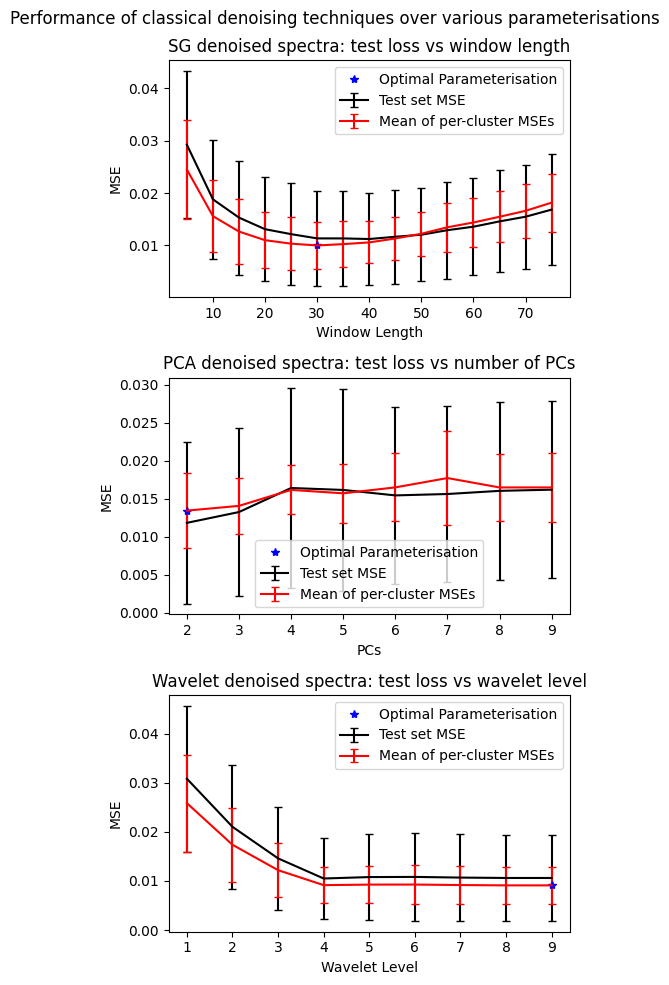

In [27]:
fig, ax = plt.subplots(3,1,figsize=(5, 10))

#ax[0].plot(sg_params, SG_MSEs)
ax[0].errorbar(sg_params, SG_MSEs, SG_stds, capsize=3,color='black',label = 'Test set MSE')
ax[0].errorbar(sg_params, SG_class_mean_MSEs, SG_class_std_MSEs, capsize=3,color='red', label = 'Mean of per-cluster MSEs')
ax[0].plot(sg_params[int(np.squeeze(sg_index_class))], SG_class_mean_MSEs[int(np.squeeze(sg_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[0].axvline(x=sg_params[int(np.squeeze(sg_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[0].set_xlabel('Window Length')
ax[0].set_ylabel('MSE')
ax[0].set_title('SG denoised spectra: test loss vs window length')
ax[0].legend()
ax[1].errorbar(pc_params,PCA_MSEs,PCA_stds, capsize=3,color='black',label = 'Test set MSE')
ax[1].errorbar(pc_params, PCA_class_mean_MSEs, PCA_class_std_MSEs, capsize=3,color='red', label = 'Mean of per-cluster MSEs')
ax[1].plot(pc_params[int(np.squeeze(pc_index_class))], PCA_class_mean_MSEs[int(np.squeeze(pc_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[1].axvline(x=pc_params[int(np.squeeze(pc_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[1].set_xlabel('PCs')
ax[1].set_ylabel('MSE')
ax[1].set_title('PCA denoised spectra: test loss vs number of PCs')
ax[1].legend()

ax[2].errorbar(np.squeeze(wav_params),np.squeeze(wav_MSEs),wav_stds, capsize=3,color='black',label = 'Test set MSE')
ax[2].errorbar(wav_params, wav_class_mean_MSEs, wav_class_std_MSEs, capsize=3,color='red', label = 'Mean of per-cluster MSEs')
ax[2].plot(wav_params[int(np.squeeze(wav_index_class))], wav_class_mean_MSEs[int(np.squeeze(wav_index_class))], 'b*', label = 'Optimal Parameterisation')
#ax[2].axvline(x=wav_params[int(np.squeeze(wav_index_class))],ls='--',color='purple',label = 'Optimal Parameterisation')
ax[2].set_xlabel('Wavelet Level')
ax[2].set_ylabel('MSE')
ax[2].set_title('Wavelet denoised spectra: test loss vs wavelet level')
ax[2].legend()
fig.suptitle('Performance of classical denoising techniques over various parameterisations')
fig.tight_layout()

Text(0.5, 1.0, 'Test MSE for all denoisining techniques')

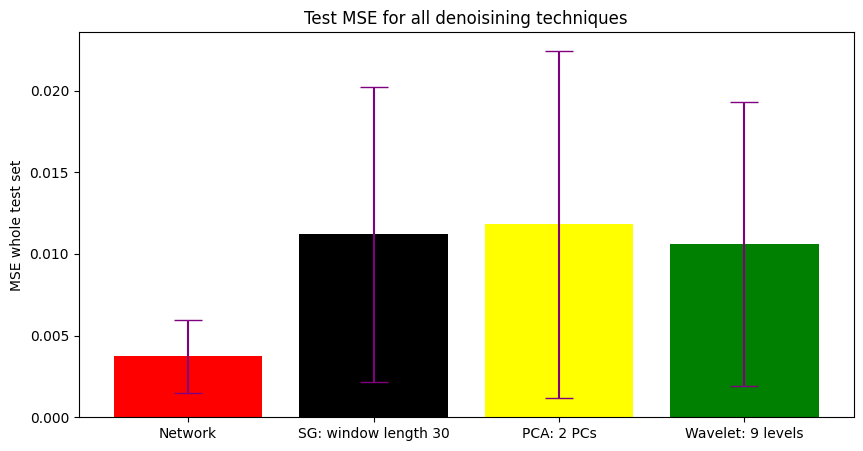

In [28]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(['Network','SG: window length ' + str(int(sg_params[sg_index_class])), 'PCA: ' + str(int(pc_params[pc_index_class])) + ' PCs', 'Wavelet: ' + str(int(wav_params[wav_index_class])) + ' levels'],[net_pred_MSE,sg_MSE_plot, pca_mse_plot, wave_mse_plot],yerr = [net_pred_std, sg_std_plot, pca_std_plot, wave_std_plot],ecolor='purple', capsize=10,color=['red', 'black', 'yellow', 'green'])
plt.ylabel('MSE whole test set')
plt.title('Test MSE for all denoisining techniques')


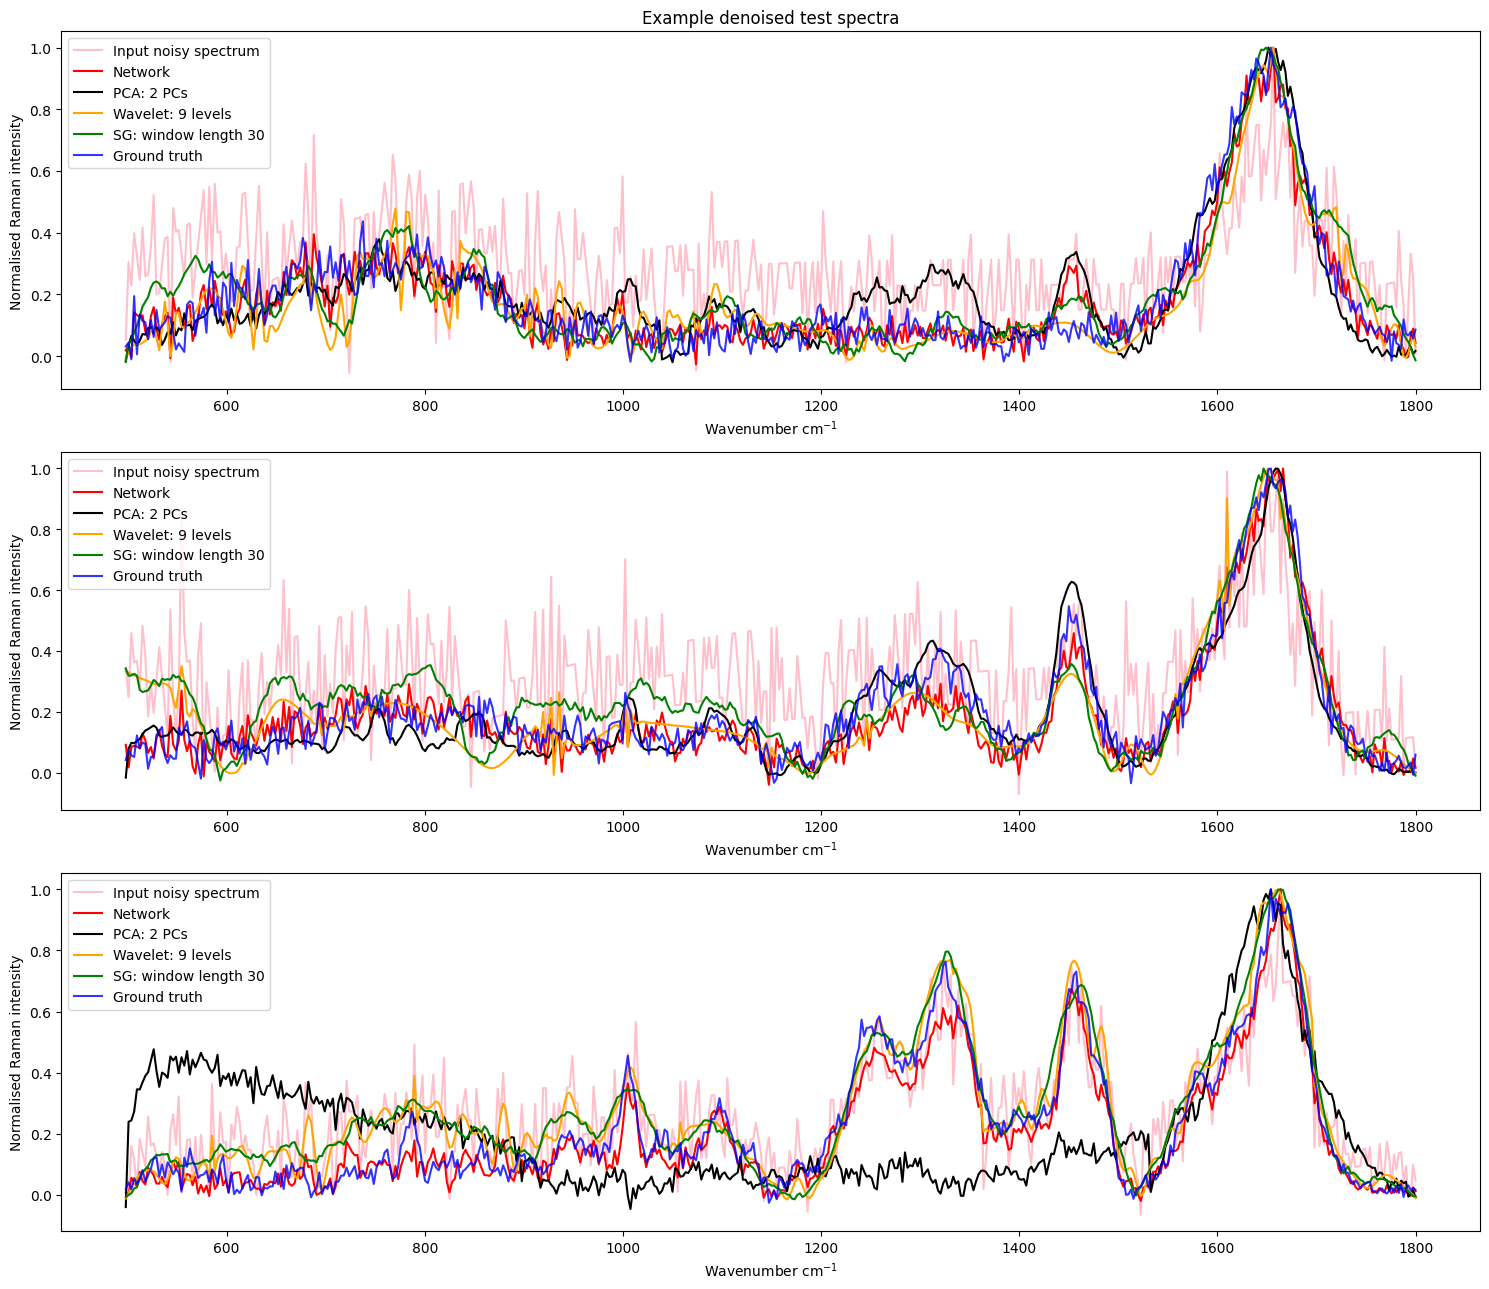

In [29]:
example_inds=[5000,3000,10000]
plot_num=3
fig, ax = plt.subplots(plot_num,figsize=(15, 13))
for i in range(plot_num):
    index = example_inds[i]
    #plt.plot(net_input[index],label='Input noisy')
    ax[i].plot(wavenumbers, np.squeeze(net_input[index]), label='Input noisy spectrum',color="pink")
    ax[i].plot(wavenumbers, np.squeeze(pred[index]), label='Network',color="red")
    ax[i].plot(wavenumbers, np.squeeze(pc[pc_index_class,index]), label='PCA: ' + str(int(pc_params[pc_index_class])) + ' PCs',color="black")
    ax[i].plot(wavenumbers, np.squeeze(wav[wav_index_class,index]), label='Wavelet: ' + str(int(wav_params[wav_index_class])) + ' levels',color="orange")
    ax[i].plot(wavenumbers, np.squeeze(sg[sg_index_class,index]), label='SG: window length ' + str(int(sg_params[sg_index_class])),color="green")
    ax[i].plot(wavenumbers, gt[index],label='Ground truth',alpha=0.8,color="blue")
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Normalised Raman intensity')
    ax[i].set_xlabel('Wavenumber cm$^{-1}$')
ax[0].set_title('Example denoised test spectra')
fig.tight_layout()